## RCLV detection in the random region and time interval

In [1]:
import numpy as np
import xarray as xr
from floater import rclv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ds = xr.open_mfdataset('/data/home/liutongya/RCLV/lavd_netcdf/2010-01-01/float_trajectories_netcdf/*.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 19, y0: 5120, x0: 11520)
Coordinates:
  * time     (time) int64 0 864000 1728000 ... 13824000 14688000 15552000
  * y0       (y0) float32 -79.98 -79.95 -79.92 -79.89 ... 79.92 79.95 79.98
  * x0       (x0) float32 0.01562 0.04688 0.07812 0.1094 ... 359.9 360.0 360.0
Data variables:
    x        (time, y0, x0) float32 dask.array<chunksize=(1, 5120, 11520), meta=np.ndarray>
    y        (time, y0, x0) float32 dask.array<chunksize=(1, 5120, 11520), meta=np.ndarray>
    z        (time, y0, x0) float32 dask.array<chunksize=(1, 5120, 11520), meta=np.ndarray>
    u        (time, y0, x0) float32 dask.array<chunksize=(1, 5120, 11520), meta=np.ndarray>
    v        (time, y0, x0) float32 dask.array<chunksize=(1, 5120, 11520), meta=np.ndarray>
    vort     (time, y0, x0) float32 dask.array<chunksize=(1, 5120, 11520), meta=np.ndarray>
    lavd     (time, y0, x0) float32 dask.array<chunksize=(1, 5120, 11520), meta=np.ndarray>

In [3]:
# AVISO data
ds_aviso = xr.open_mfdataset('/data/data_pub/dataset-duacs-rep-global-merged-allsat-phy-l4/merged/*_2010*.nc')

### Kuroshio region, 30-day RCLVs

In [4]:
n_time = 3

xx0 = 130; xx1 = 150;
yy0 = 20; yy1 = 30;

lx0 = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).x[0, :, :]
lx1 = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).x[n_time, :, :]

ly0 = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).y[0, :, :]
ly1 = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).y[n_time, :, :]

lxt = (lx0.values, lx1.values)
lyt = (ly0.values, ly1.values)

lavd = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).lavd[n_time, :, :].to_masked_array().filled(0)

In [5]:
# ci_th -1 cd 0.1
kwargs = dict(CI_th=-1, CI_tol=0.1, min_distance=13, min_limit_diff=1e-8,
              min_area=169, max_footprint=100000, use_threadpool=True, progress=True, convex_def=0.1, 
              max_width=100, min_peak=1e-6)

contours = list(rclv.find_convex_contours(lavd, lxt, lyt, **kwargs))

  0%|          | 0/82 [00:00<?, ?it/s]/data/home/liutongya/tools/floater/floater/rclv.py:220: RuntimeWarning: invalid value encountered in float_scalars
  CI = (var_0-var_t)/var_0
100%|██████████| 82/82 [00:06<00:00, 11.90it/s]


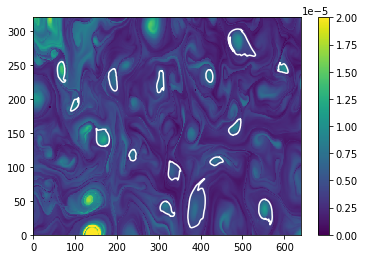

In [6]:
plt.pcolormesh(lavd, vmax=2e-5)
plt.colorbar()

for i in np.arange(0, len(contours), 1):
    data = contours[i][1]
    plt.plot(data[:,1], data[:,0], color='w', linewidth=1.5)

In [7]:
all_contours = [r[1] for r in contours]
labels = rclv.label_points_in_contours(lavd.shape, all_contours)
labels[labels>0] = 1
labels = np.ma.masked_array(labels, mask=labels==0)

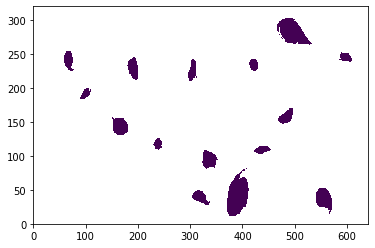

In [8]:
plt.pcolormesh(labels)

In [9]:
pos_x0 = lx0.values * labels
pos_y0 = ly0.values * labels

pos_x1 = lx1.values * labels
pos_y1 = ly1.values * labels

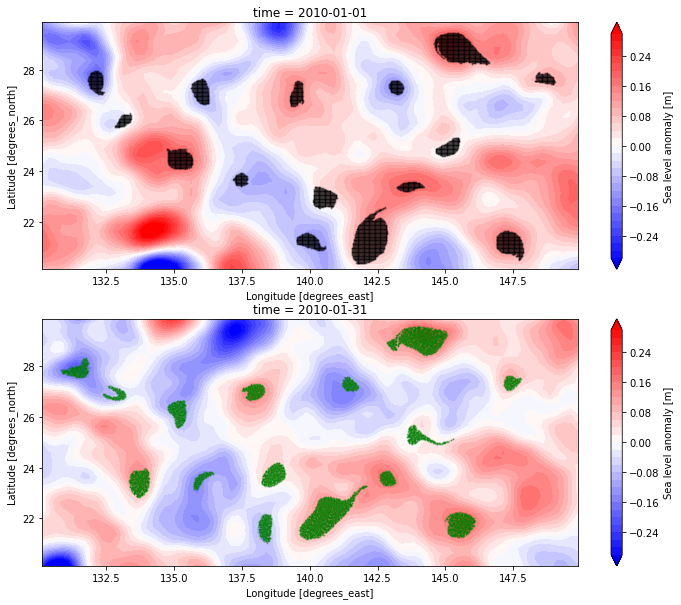

In [10]:

fig = plt.figure(figsize=(12, 10))

plt.subplot(211)
ds_aviso.sel(longitude=slice(xx0,xx1), latitude=slice(yy0,yy1), time='2010-01-01').sla.plot.contourf(levels=np.arange(-0.3,0.301,0.02), cmap='bwr', extend='both')
plt.scatter(pos_x0, pos_y0, s=1, color='k', alpha=0.3)

plt.subplot(212)
ds_aviso.sel(longitude=slice(xx0,xx1), latitude=slice(yy0,yy1), time='2010-01-31').sla.plot.contourf(levels=np.arange(-0.3,0.301,0.02), cmap='bwr', extend='both')
plt.scatter(pos_x1, pos_y1, s=1, color='g', alpha=0.3)

### ACC region, 90-day RCLVs

In [11]:
n_time = 9

xx0 = 240; xx1 = 260;
yy0 = -60; yy1 = -40;

lx0 = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).x[0, :, :]
lx1 = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).x[n_time, :, :]

ly0 = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).y[0, :, :]
ly1 = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).y[n_time, :, :]

lxt = (lx0.values, lx1.values)
lyt = (ly0.values, ly1.values)

lavd = ds.sel(x0=slice(xx0,xx1), y0=slice(yy0,yy1)).lavd[n_time, :, :].to_masked_array().filled(0)

# ci_th -1 cd 0.1
kwargs = dict(CI_th=-1, CI_tol=0.1, min_distance=13, min_limit_diff=1e-8,
              min_area=169, max_footprint=100000, use_threadpool=True, progress=True, convex_def=0.1, 
              max_width=100, min_peak=1e-6)

contours = list(rclv.find_convex_contours(lavd, lxt, lyt, **kwargs))

  0%|          | 0/198 [00:00<?, ?it/s]/data/home/liutongya/tools/floater/floater/rclv.py:220: RuntimeWarning: invalid value encountered in float_scalars
  CI = (var_0-var_t)/var_0
100%|██████████| 198/198 [00:29<00:00,  6.71it/s]


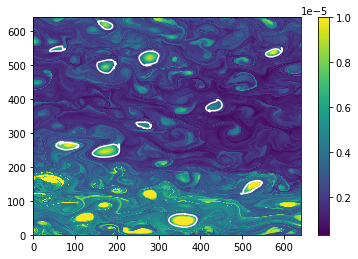

In [12]:
plt.pcolormesh(lavd, vmax=1e-5)
plt.colorbar()

for i in np.arange(0, len(contours), 1):
    data = contours[i][1]
    plt.plot(data[:,1], data[:,0], color='w', linewidth=1.5)

In [13]:
all_contours = [r[1] for r in contours]
labels = rclv.label_points_in_contours(lavd.shape, all_contours)
labels[labels>0] = 1
labels = np.ma.masked_array(labels, mask=labels==0)

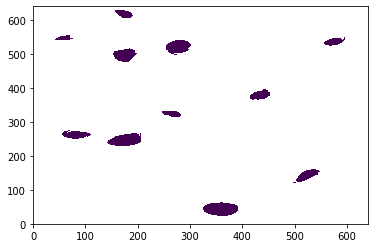

In [14]:
plt.pcolormesh(labels)

In [15]:
pos_x0 = lx0.values * labels
pos_y0 = ly0.values * labels

pos_x1 = lx1.values * labels
pos_y1 = ly1.values * labels

(-60.0, -40.0)

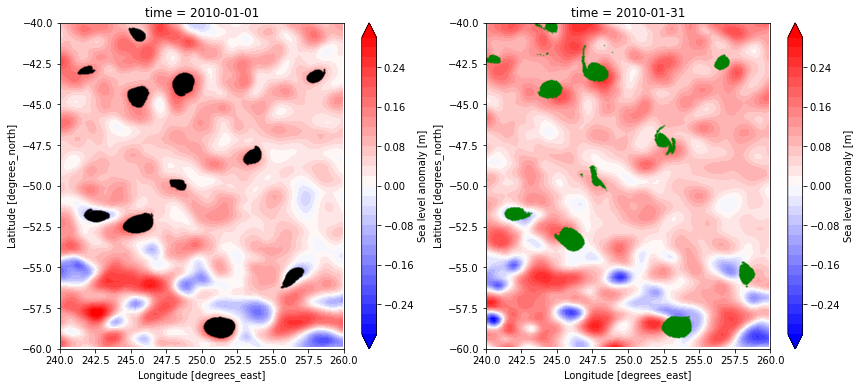

In [16]:

fig = plt.figure(figsize=(14, 6))

plt.subplot(121)
ds_aviso.sel(longitude=slice(xx0,xx1), latitude=slice(yy0,yy1), time='2010-01-01').sla.plot.contourf(levels=np.arange(-0.3,0.301,0.02), cmap='bwr', extend='both')
plt.scatter(pos_x0, pos_y0, s=1, color='k', alpha=0.3)
plt.xlim(240, 260)
plt.ylim(-60, -40)

plt.subplot(122)
ds_aviso.sel(longitude=slice(xx0,xx1), latitude=slice(yy0,yy1), time='2010-01-31').sla.plot.contourf(levels=np.arange(-0.3,0.301,0.02), cmap='bwr', extend='both')
plt.scatter(pos_x1, pos_y1, s=1, color='g', alpha=0.3)
plt.xlim(240, 260)
plt.ylim(-60, -40)